#  Employee Performance Analysis - INX Future Inc

The objective was to accurately predict the performance rating of the employees using various features present in the data such as total work experience, department, current role, etc. 

The Goals and Insights of the project were as follows:
1. Finding the Department wise performances of the employees.
2. Determining the top 3 Important Factors affecting employee performance.
3. Constructing a trained model which can predict the employee performance based on factors as inputs.
4. Providing recommendations to improve the employee performance based on insights from analysis.

The data of 1200 employees from INX_Future_Inc, which had 28 qualitative and quantitative features was provided.

<brc>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_excel('INX_Future_Inc.xls', sheet_name=0)

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
data.shape

(1200, 28)

In [243]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

As there are no null values, no rows need to be dropped or filled in. 

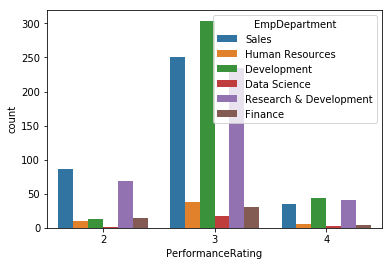

In [6]:
sns.countplot(data['PerformanceRating'], hue=data['EmpDepartment'])

The first goal was finding the department wise performance of the employees. The countplot above can help visualize.

In [15]:
data.groupby(data['EmpDepartment']).mean()['PerformanceRating']

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

As the Development Department has the highest Performance Rating average, it can be called the best performing department.

Qualitative features need to be transformed into quantitative values.

As these features consisted of only 2 or 3 values, Label Encoding was used to transform them: gender, mstatus, btravelfreq, overtime, attrition
The get dummies function was used for the rest: EducationBackground, dep, jobrole

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

In [0]:
data['Gender'] = le.fit_transform(data['Gender'])

In [0]:
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])

In [0]:
data['BusinessTravelFrequency'] = le.fit_transform(data['BusinessTravelFrequency'])

In [0]:
['OverTime'] = le.fit_transform(data['OverTime'])

In [0]:
data['Attrition'] = le.fit_transform(data['Attrition'])

In [252]:
data.corr()

,Age,Gender,MaritalStatus,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.098368,0.040579,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,0.051910,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,-0.042169,-0.043608,-0.001507,-0.022960,0.000033,0.002218,0.010949,-0.050685,0.024680,-0.036675,-0.038410,-0.005319,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
MaritalStatus,-0.098368,-0.042169,1.000000,0.028520,-0.019148,0.026737,-0.032467,-0.013540,-0.043355,-0.087359,0.044593,-0.030095,-0.022833,0.010128,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
BusinessTravelFrequency,0.040579,-0.043608,0.028520,1.000000,-0.020935,0.002064,0.012267,0.025400,0.016652,0.036360,-0.031236,0.021476,0.032229,-0.041946,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.019148,-0.020935,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.024940,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,0.026737,0.002064,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,-0.021119,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,-0.032467,0.012267,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,0.064270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561
EmpHourlyRate,0.062867,0.002218,-0.013540,0.025400,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.032636,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.026313,-0.043116
EmpJobInvolvement,0.027216,0.010949,-0.043355,0.016652,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.011069,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.153360,-0.010539
EmpJobLevel,0.509139,-0.050685,-0.087359,0.036360,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,0.030012,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.175763,-0.076632


Using the correlation table above, the conclution can be made that Environment Satisfaction, Last Salary Hike Percent, and the Years Since Last Promotion affected the Performance Rating MOST. (2nd goal)

In [0]:
#Coloumns with high correlation
#EmpEnvironmentSatisfaction 10,
#EmpLastHike 17,
#EmpWorklikeBalance 21,
#ExperienceYears 22,
#ExpYearscurrentrole 23,
#yearslastpromo 24,
#yearscurrentmanager 25, 
#empdept,empjobrole

Applying get dummies function as mentioned above:

In [256]:
j = pd.get_dummies(data['EmpJobRole'])
j.head()


,Business Analyst,Data Scientist,Delivery Manager,Developer,Finance Manager,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manager R&D,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Senior Developer,Senior Manager R&D,Technical Architect,Technical Lead
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
d = pd.get_dummies(data['EmpDepartment'])
d.columns = ['ds', 'd', 'f', 'hr', 'rnd', 's']

In [0]:
x = data.iloc[:, [10,17,21,22,23,24,25]]

In [0]:
x = pd.concat([j,x,d], axis=1)

X contains the features I condsidered important for classification. 

In [260]:
x.head()

,Business Analyst,Data Scientist,Delivery Manager,Developer,Finance Manager,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manager R&D,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Senior Developer,Senior Manager R&D,Technical Architect,Technical Lead,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ds,d,f,hr,rnd,s
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,12,2,10,7,0,8,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,12,3,7,7,1,7,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,21,3,18,13,1,12,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,15,2,21,6,12,6,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,14,3,2,2,2,2,0,0,0,0,0,1


Y contains the target, that is the performance rating (Which needs to be predicted)

In [0]:
y = data.PerformanceRating

Following which I split the data for training and testing purposes.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10)

I decided to train the model using XGBOOST and as the target data is discrete, a classifier was used.

In [0]:
from xgboost import XGBClassifier

In [0]:
model = XGBClassifier()

In [266]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predictions = model.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [269]:
accuracy_score(y_test, predictions)

0.9266666666666666

And this way, a model that can predict the employee performance with an accuracy of 92.6% was developed. (Goal 3)

Conclusion:
Using the analysis done above, my recommendation for the company would be to improve the working envoironment as satisfied employees, who got regular hikes and promotions performed the best!